In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer,StandardScaler,Normalizer
#import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
data=pd.read_csv("train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
data.head()
#numerical>>PassengerID,Age,Fare
#numeric_classificational>>,Survived,Pclass,Sibsp,Parch
#Categorical>>Name,Sex
#AlphaNumeric>>Ticket,Cabin

print(data.isnull().sum())
#Cabin has higher missing values so imputing this will result in biased model>>del cabin:)
data=data.drop("Cabin",axis=1)

data.describe()
#No use in PassengerID>>del it:)
data=data.drop("PassengerId",axis=1)
#So many people died than survived
#Age range-0.4 to 80
#Siblings range 0-8
#Parents range 0-6

data.describe(include="O")
#Name is fully unique no use but some people have higher status worth considering later :)$$$
#for now remove Name if it affects model accuracy retain Name

data=data.drop("Name",axis=1)
#Sex male is higher(577)
#Ticket must be unique but 210 are not unique maybe any misconception and doesnt contribute much to our model>>del it:)

data=data.drop("Ticket",axis=1)
Embarked>>most people boarded in Southampton

data.describe(include="all")
#Age has many missing variables check its correlaton with survived in Visualization

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Vander Planke, Miss. Augusta Maria",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


UNIVARIATE ANALYSIS:>>

C:\Users\vijay\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\vijay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\vijay\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\vijay\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  war

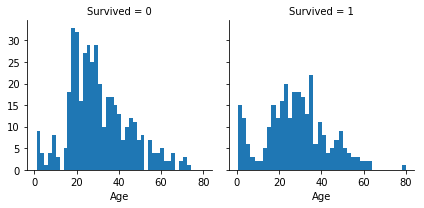

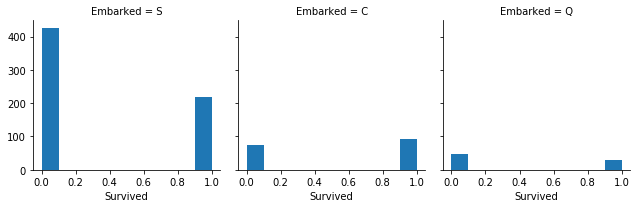

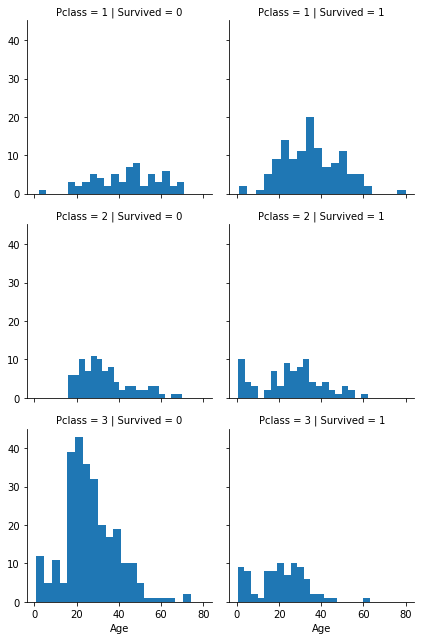

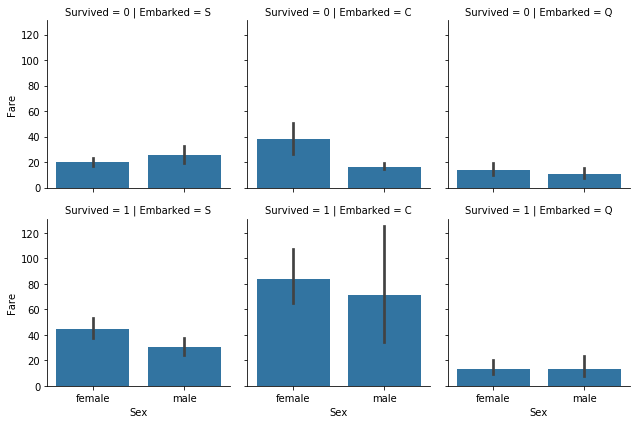

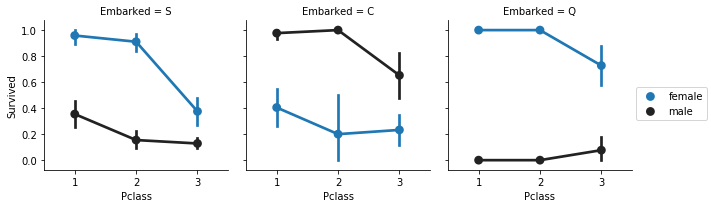

In [439]:
#>>Univariate
graph=sns.FacetGrid(data,col="Survived")
graph.map(plt.hist,"Age",bins=40)
#New born childs(0-5) have higher chances of survival
#all 80 aged people survived
#most people are between 15-35 range

g1=sns.FacetGrid(data,col="Embarked")
g1.map(plt.hist,"Survived")
#C has best survival than Q and then S[C>Q>S]

#>>Multivariate
#>>numerical&categorical features
g2=sns.FacetGrid(data,row="Pclass",col="Survived")
g2.map(plt.hist,"Age",bins=20)
#p1 class people survived mostly
#most p3 class people didnt survived 
#Half of new born childs in class 3 not survived 
#finally Pclass has higher insights higher priority

g3=sns.FacetGrid(data,row="Survived",col="Embarked")
g3.map(sns.barplot,"Sex","Fare")

#>>Categorical features
g4=sns.FacetGrid(data,col="Embarked")#change col to row to get a single row of plots
g4.map(sns.pointplot,"Pclass","Survived","Sex")
g4.add_legend()
#In S>>1 & 2 class female has higher survival rate>>pClass highly contributes our model
#In C>>same as above but it is male^>>gender highly contributes our model
#In Q>>male has severely lower survival and vice versa for female
#From all this 1 and 2 class people have higher survival but opposite in Embarked C:)


In [24]:
#Filling Nan Values
print(data.Embarked.mode())
data["Embarked"]=data["Embarked"].fillna(data.Embarked.mode()[0])



0    S
dtype: object


Categorical - Numeric

In [25]:
#converting Sex feature to numeric also can be done using get dummies
data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
data['Embarked'] = data['Embarked'].map( {'S': 1, 'Q': 2,"C":3} ).astype(int)


In [7]:
sns.catplot(x="Pclass", hue="Embarked", col="Survived",data=data, kind="count")#check stackoverflow

AttributeError: module 'seaborn' has no attribute 'catplot'

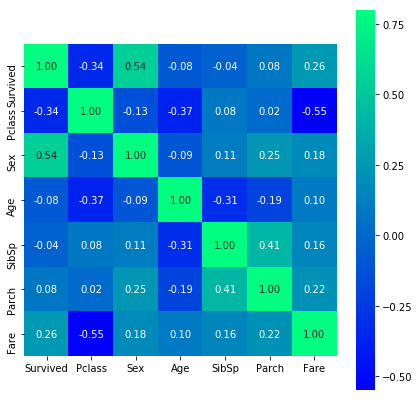

In [82]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,fmt=".2f",cmap="winter")
#no correlation between any features

In [26]:
#Create a new feature by bands with age
data["Ageband"]=pd.cut(data["Age"],20)
data[["Ageband","Survived"]].groupby("Ageband").mean()

,Survived
Ageband,
"(0.34, 4.399]",0.675000
"(4.399, 8.378]",0.642857
"(8.378, 12.357]",0.266667
"(12.357, 16.336]",0.483871
"(16.336, 20.315]",0.341772
"(20.315, 24.294]",0.367347
"(24.294, 28.273]",0.352941
"(28.273, 32.252]",0.416667
"(32.252, 36.231]",0.479452


In [443]:
#data=pd.DataFrame(data)
data[["Pclass","Survived"]].groupby("Pclass").mean().sort_values(by='Survived',ascending=False)#Groupby groups data in accordance with passed argument(Pclass)
#Pclass 1 people has higher chances of survival(62%)[1>2>3]
data[["Sex","Survived"]].groupby("Sex").mean().sort_values(by='Survived',ascending=False)
#Female has higher chances of survival of about(74%)[Female>male]
data[["Age","Survived"]].groupby("Age").mean().sort_values(by='Survived',ascending=False)
#88 diff rows so doesnt get much insights better try to get a new feature from this feature like set of age groups 
#Histogram chart is best suited to visualize a continuous features in visualizing
data[["SibSp","Survived"]].groupby("SibSp").mean().sort_values(by='Survived',ascending=False)
#from this if the number of siblings increases chances of survival will decrease except 0 siblings[1>2>0>3>4>5&8]
data[["Parch","Survived"]].groupby("Parch").mean().sort_values(by='Survived',ascending=False)
#looks like parch with [1,2,3] have higher chances of survival > than [0,5] & no survival rate [4,6] >>Try to make a new feature
data[["Fare","Survived"]].groupby("Fare").mean().sort_values(by='Survived',ascending=False)
#Looks like people with higher fares also survived sand same as low fare[think doesnt give insights from this feature]>>visualize this feature
data[["Embarked","Survived"]].groupby("Embarked").mean().sort_values(by='Survived',ascending=False)
#people from port 'C' has 50% chance of survival than 'Q'(38%) & 'S'(33%) and change the mean with the count above we can see S has higher number of people and C has less people


,Survived
Embarked,
3,0.553571
2,0.389610
1,0.339009


In [27]:
data.loc[ data[ "SibSp" ] == 5 , "SibSp" ] = 0
data.loc[ data[ "SibSp" ] == 8,  "SibSp" ] = 0
data.loc[ data[ "SibSp" ] == 4,  "SibSp" ] = 1
data.loc[ data[ "SibSp" ] == 3,  "SibSp" ] = 2
data.loc[ data[ "SibSp" ] == 0,  "SibSp" ] = 3
data.loc[ data[ "SibSp" ] == 2,  "SibSp" ] = 4
data.loc[ data[ "SibSp" ] == 1,  "SibSp" ] = 5


In [28]:
data.loc[ data[ "Parch" ] == 4 , "Parch" ] = 0
data.loc[ data[ "Parch" ] == 6,  "Parch" ] = 0
data.loc[ data[ "Parch" ] == 5,  "Parch" ] = 1
data.loc[ data[ "Parch" ] == 0,  "Parch" ] = 2
data.loc[ data[ "Parch" ] == 2,  "Parch" ] = 3
data.loc[ data[ "Parch" ] == 1,  "Parch" ] = 4
data.loc[ data[ "Parch" ] == 3,  "Parch" ] = 5

In [29]:
# Used ageband to convert age on the basis of band survival rate    
data.loc[ data['Age'] <= 8, 'Age'] = 4
data.loc[(data['Age'] > 8) & (data['Age'] <= 12), 'Age'] = 1
data.loc[(data['Age'] > 12) & (data['Age'] <= 16), 'Age'] = 3
data.loc[(data['Age'] > 16) & (data['Age'] <= 28), 'Age'] = 2
data.loc[(data['Age'] > 28) & (data['Age'] <= 36), 'Age'] = 3
data.loc[(data['Age'] > 36) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 56), 'Age'] = 3
data.loc[(data['Age'] > 56) & (data['Age'] <= 64), 'Age'] = 2
data.loc[(data['Age'] > 64) & (data['Age'] <= 76), 'Age'] = 0
data.loc[ data['Age'] > 76, 'Age']=5
data=data.drop("Ageband",axis=1)

data['Pclass'] = data['Pclass'].map( {3:1,2:2,1:3} )
#data=data.drop("Fare",axis=1)

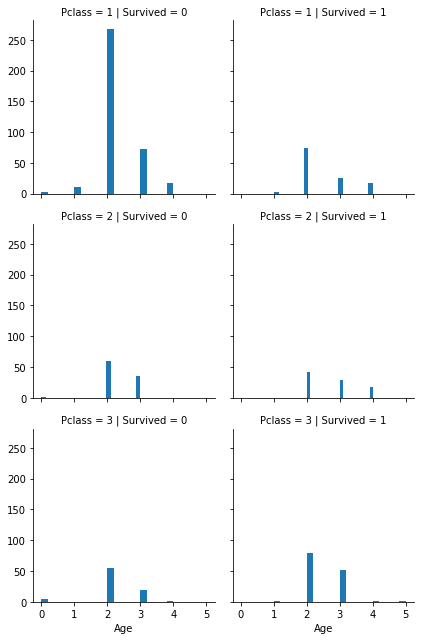

In [30]:
imp = Imputer(missing_values=np.NaN,strategy='most_frequent')
data["Age"]=imp.fit_transform(data["Age"].values.reshape(-1, 1))
g2=sns.FacetGrid(data,row="Pclass",col="Survived")
g2.map(plt.hist,"Age",bins=20)

In [31]:
data.isnull().sum()
y_data=data["Survived"]
data=data.drop("Survived",axis=1)

In [32]:
scaler = StandardScaler()

#data['Fare'] = data['Fare'].astype(int)
data["Fare"]=pd.DataFrame(scaler.fit_transform(data["Fare"].values.reshape(-1,1)))


In [33]:
data["Embarked"]=pd.DataFrame(scaler.fit_transform(data["Embarked"].values.reshape(-1,1)))

C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [34]:
data[:30]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,2.0,5,5,-0.502445,-0.585954
1,3,1,2.0,5,5,0.786845,1.942303
2,1,1,2.0,3,5,-0.488854,-0.585954
3,3,1,3.0,5,5,0.420730,-0.585954
4,1,0,3.0,3,5,-0.486337,-0.585954
5,1,0,2.0,3,5,-0.478116,0.678175
6,3,0,3.0,3,5,0.395814,-0.585954
7,1,0,4.0,4,4,-0.224083,-0.585954
8,1,1,2.0,3,5,-0.424256,-0.585954
9,2,1,3.0,5,5,-0.042956,1.942303


In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data,y_data,test_size=0.2,random_state=0)


0.9102132435465768
0.8268156424581006


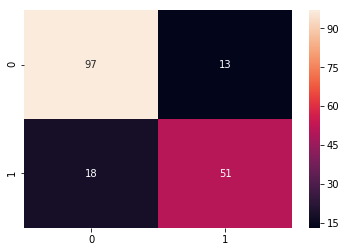

In [20]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)
print(model.score(data,y_data))

from sklearn.metrics import accuracy_score,confusion_matrix
predict=model.predict(x_test)
acc=accuracy_score(y_test,predict)
print(acc)

con=confusion_matrix(y_test,predict)
sns.heatmap(con,annot=True,fmt="d")

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

model=SVC(C=2)#LogisticRegression(random_state=42)
model.fit(data,y_data)
print(model.score(data,y_data))
# from sklearn.metrics import accuracy_score,confusion_matrix
# predict=model.predict(x_test)
# acc=accuracy_score(y_test,predict)
# print(acc)

# con=confusion_matrix(y_test,predict)
# sns.heatmap(con,annot=True,fmt="d")

0.8249158249158249


In [54]:
tdata=pd.read_csv("test.csv")
list=["PassengerId","Ticket","Cabin","Name"]
tdata=tdata.drop(list,axis=1)

tdata['Sex'] = tdata['Sex'].map({'female': 1, 'male': 0}).astype(int)
tdata['Embarked'] = tdata['Embarked'].map( {'S': 1, 'Q': 2,"C":3} ).astype(int)

imp = Imputer(missing_values=np.NaN,strategy='mean')
tdata["Fare"]=imp.fit_transform(tdata["Fare"].values.reshape(-1, 1))
tdata.isnull().sum()
tdata["Age"]=imp.fit_transform(tdata["Age"].values.reshape(-1, 1))

In [55]:
tdata["Ageband"]=pd.cut(tdata["Age"],20)
# Used ageband to convert age on the basis of band survival rate    
tdata.loc[ tdata['Age'] <= 8, 'Age'] = 4
tdata.loc[(tdata['Age'] > 8) & (tdata['Age'] <= 12), 'Age'] = 1
tdata.loc[(tdata['Age'] > 12) & (tdata['Age'] <= 16), 'Age'] = 3
tdata.loc[(tdata['Age'] > 16) & (tdata['Age'] <= 28), 'Age'] = 2
tdata.loc[(tdata['Age'] > 28) & (tdata['Age'] <= 36), 'Age'] = 3
tdata.loc[(tdata['Age'] > 36) & (tdata['Age'] <= 48), 'Age'] = 2
tdata.loc[(tdata['Age'] > 48) & (tdata['Age'] <= 56), 'Age'] = 3
tdata.loc[(tdata['Age'] > 56) & (tdata['Age'] <= 64), 'Age'] = 2
tdata.loc[(tdata['Age'] > 64) & (tdata['Age'] <= 76), 'Age'] = 0
tdata.loc[ tdata['Age'] > 76, 'Age']=5
tdata=tdata.drop("Ageband",axis=1)

tdata['Pclass'] = tdata['Pclass'].map( {3:1,2:2,1:3} )
#tdata=tdata.drop("Fare",axis=1)

In [56]:
tdata.loc[ tdata[ "SibSp" ] == 5 , "SibSp" ] = 0
tdata.loc[ tdata[ "SibSp" ] == 8,  "SibSp" ] = 0
tdata.loc[ tdata[ "SibSp" ] == 4,  "SibSp" ] = 1
tdata.loc[ tdata[ "SibSp" ] == 3,  "SibSp" ] = 2
tdata.loc[ tdata[ "SibSp" ] == 0,  "SibSp" ] = 3
tdata.loc[ tdata[ "SibSp" ] == 2,  "SibSp" ] = 4
tdata.loc[ tdata[ "SibSp" ] == 1,  "SibSp" ] = 5

tdata.loc[ tdata[ "Parch" ] == 4 , "Parch" ] = 0
tdata.loc[ tdata[ "Parch" ] == 6,  "Parch" ] = 0
tdata.loc[ tdata[ "Parch" ] == 5,  "Parch" ] = 1
tdata.loc[ tdata[ "Parch" ] == 0,  "Parch" ] = 2
tdata.loc[ tdata[ "Parch" ] == 2,  "Parch" ] = 3
tdata.loc[ tdata[ "Parch" ] == 1,  "Parch" ] = 4
tdata.loc[ tdata[ "Parch" ] == 3,  "Parch" ] = 5

In [57]:
tdata["Fare"]=pd.DataFrame(scaler.fit_transform(tdata["Fare"].values.reshape(-1,1)))


In [58]:
tdata[:20]


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3.0,3,5,-0.498407,2
1,1,1,2.0,5,5,-0.513274,1
2,2,0,2.0,3,5,-0.465088,2
3,1,0,2.0,3,5,-0.483466,1
4,1,1,2.0,5,4,-0.418471,1
5,1,0,3.0,3,5,-0.473381,1
6,1,1,3.0,3,5,-0.501993,2
7,2,0,2.0,5,4,-0.118823,1
8,1,1,2.0,3,5,-0.509165,3
9,1,0,2.0,4,5,-0.205781,1


In [62]:
predict=model.predict(tdata)

In [63]:
prediction = pd.DataFrame(predict, columns=['Survived']).to_csv('predict.csv',index=False)